In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely.geometry
import seaborn as sns
import plotly.express as px
import re
from matplotlib.colors import TwoSlopeNorm
import missingno as msno
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import math

In [2]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pd.set_option('display.max_columns', None)

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200

In [4]:
# Projected Coordinate System: how you project onto a 2D plane
epsg_2d = 26717 
# Toronto Police Service Open Data includes geographic location information provided in
# the projected coordinate system NAD 1927 UTM 17N
# https://epsg.io/26717

# Geographic Coordinate System: how coordinates are represented in a 3D space
# World Geodetic System 1984 (WGS84)
# https://epsg.io/4326
epsg_3d = 4326 

In [5]:
stations_point = gpd.read_file('./clean_data/stations_point.geojson')
stations_area = gpd.read_file('./clean_data/stations_area.geojson')
neighbourhoods = gpd.read_file('./clean_data/neighbourhoods.geojson')
neighborhoods_rental = gpd.read_file('./clean_data/neighbourhoods_rental.geojson')
neighbourhoods_crime = gpd.read_file('./clean_data/neighbourhoods_crime.geojson')
neighbourhoods_collision = gpd.read_file('./clean_data/neighbourhoods_collision.geojson')

# All-in plot

Text(0.5, 402.23608550009055, 'Longitude')

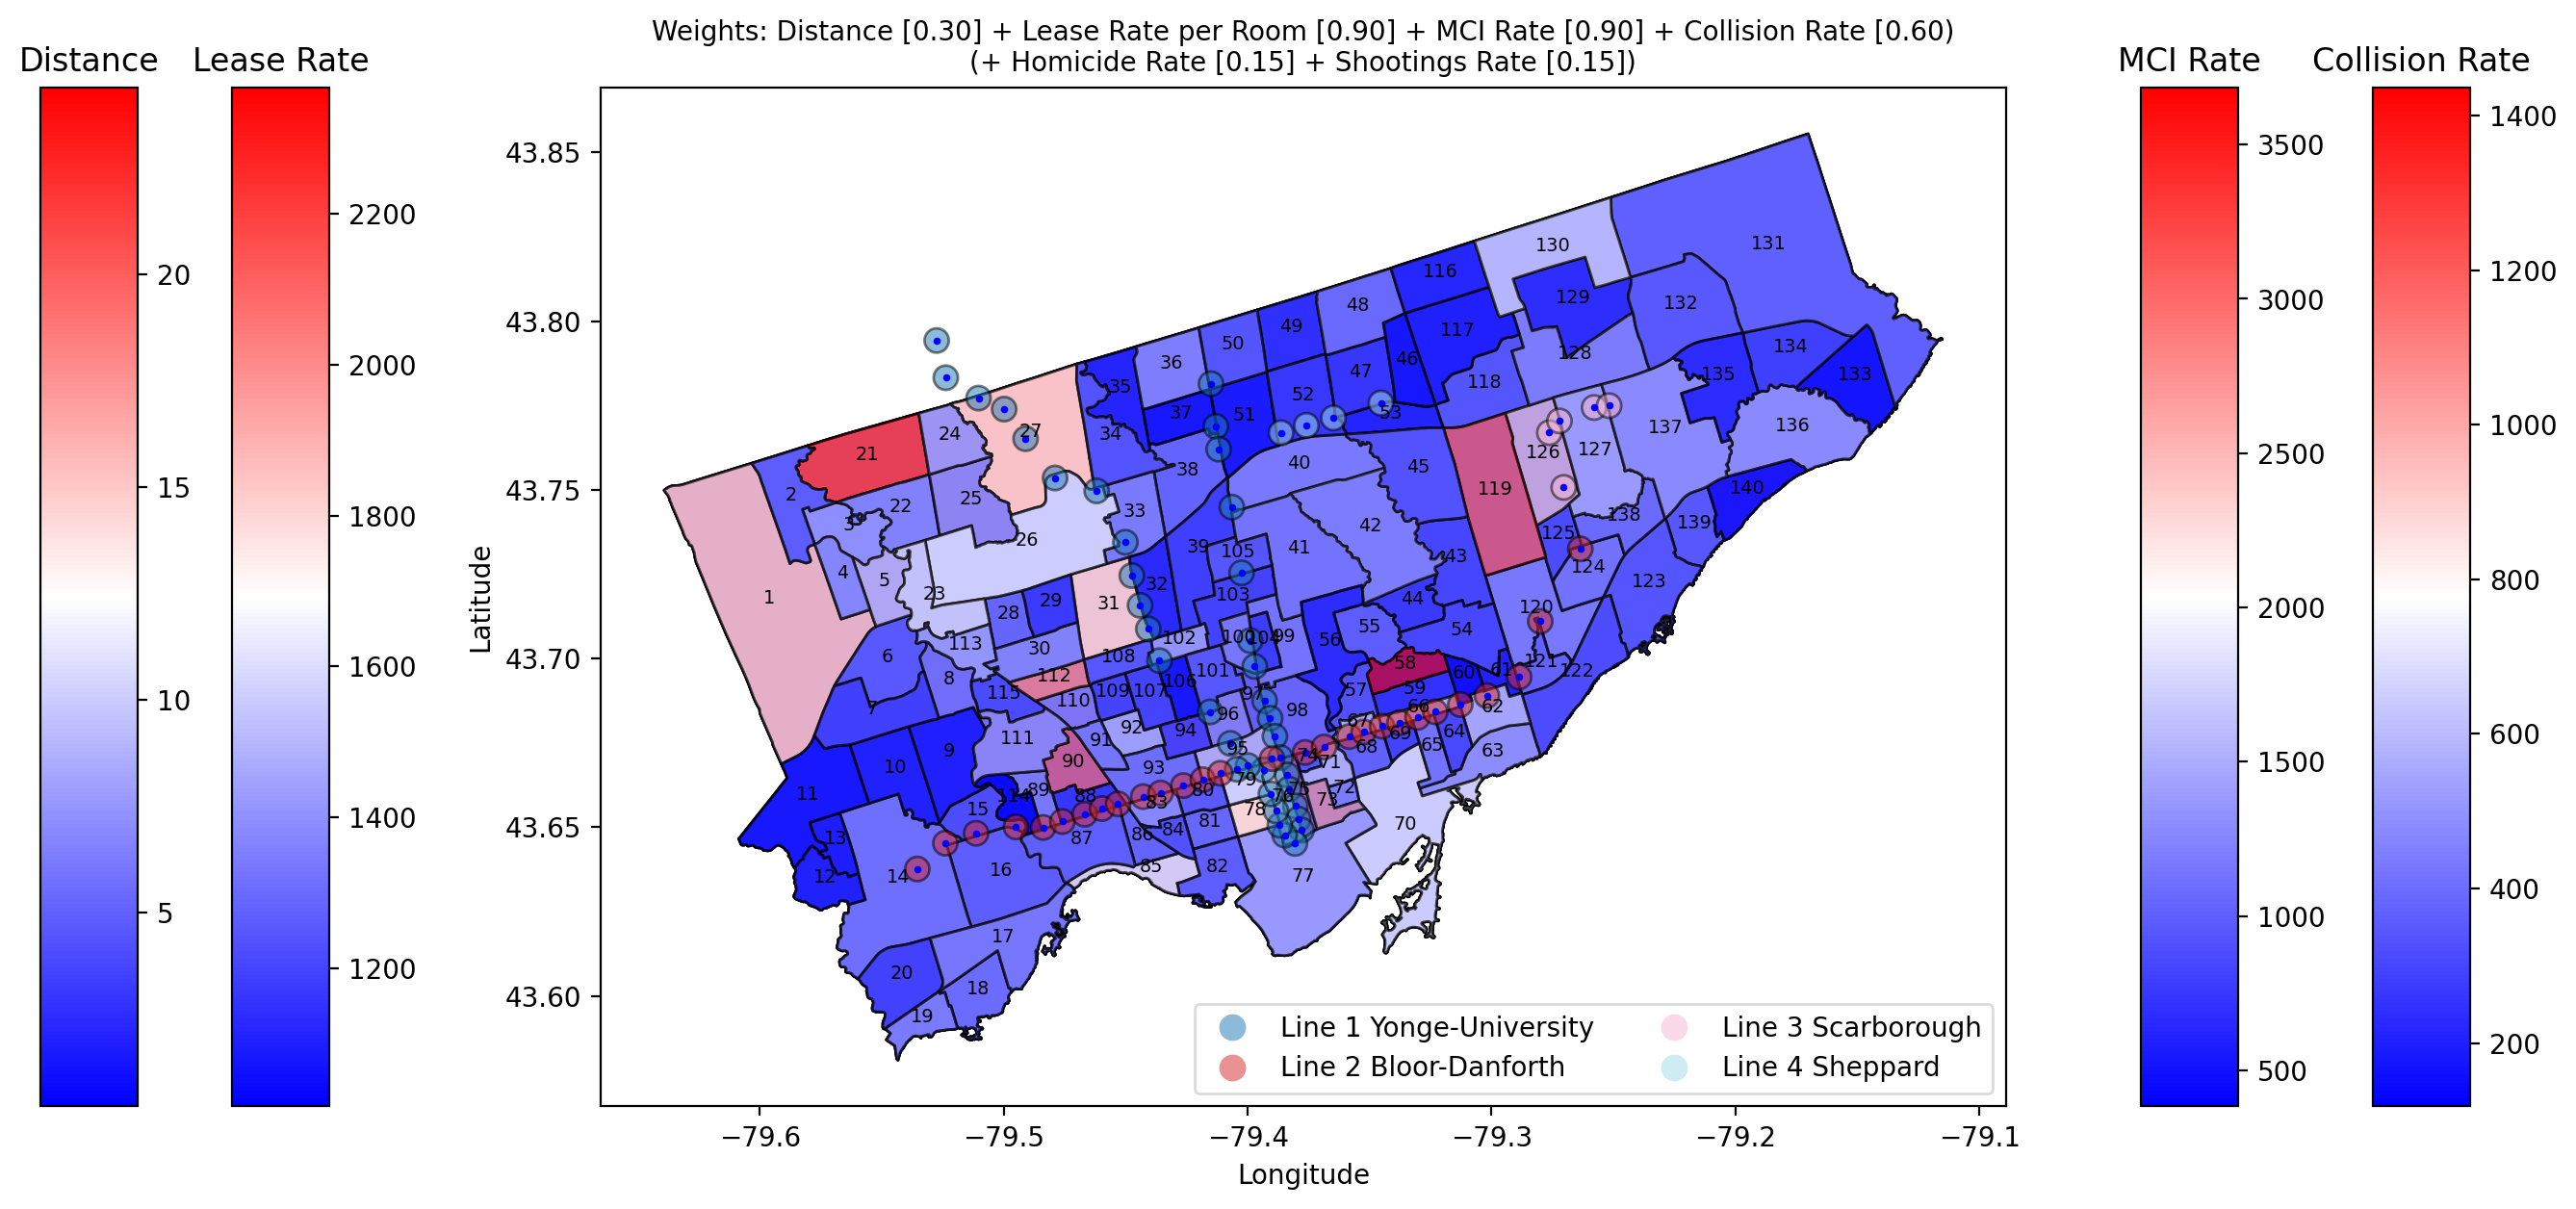

In [6]:
# weights for coloring
alphas = {'distance': 0.1, 
          'rental': 0.3, 
          'safety': 0.3, 
          'safety_homicide': 0.05,
          'safety_shootings': 0.05,
          'traffic': 0.2}

# alphas = {'distance': 0, 
#           'rental': 0, 
#           'safety': 0.3, 
#           'safety_homicide': 0,
#           'safety_shootings': 0,
#           'traffic': 0}

# multiplier for better contrast
for key, value in alphas.items():
    alphas[key] = value * 3

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", pad=1)
cax.title.set_text('Distance')
neighbourhoods.plot(column = 'distance_km', 
                    cmap = 'bwr',
                    edgecolor = 'black',
                    alpha = alphas['distance'],
                    ax = ax,
                    cax = cax,
                    legend = True,
                    )
# annotate neighbourhood names
for geometry, label in zip(neighbourhoods.geometry, neighbourhoods.Hood_ID):
    ax.annotate(label, xy=(geometry.centroid.x, geometry.centroid.y), ha='center', size='x-small')

year = 2021
quarter = 4
selected_period = neighborhoods_rental.loc[(neighborhoods_rental['Year'] == year) & (neighborhoods_rental['Quarter'] == quarter)]
cax2 = divider.append_axes("left", size="5%", pad=-1.5)
cax2.title.set_text('Lease Rate')
selected_period.plot(column = 'Two_Bedroom_Avg_Lease_Rate_Per_Room', 
                     cmap = 'bwr',
                     edgecolor = 'black',
                     alpha = alphas['rental'],
                     ax = ax,
                     cax = cax2,
                     legend = True,
                     )


var = "MCI_Rate"
year = 2021
cax3 = divider.append_axes("right", size="5%", pad=-0.7)
cax3.title.set_text('MCI Rate')
neighbourhoods_crime.plot(column = var + str(year), 
                          cmap = 'bwr',
                          edgecolor = 'black',
                          alpha = alphas['safety'],
                          ax = ax,
                          cax = cax3,
                          legend = True
                          )

var = "Homicide_Rate"
year = 2021
neighbourhoods_crime.plot(column = var + str(year), 
                          cmap = 'bwr',
                          edgecolor = 'black',
                          alpha = alphas['safety_homicide'],
                          ax = ax,
                        #   cax = cax3,
                        #   legend = True
                          )

var = "Shootings_Rate"
year = 2021
neighbourhoods_crime.plot(column = var + str(year), 
                          cmap = 'bwr',
                          edgecolor = 'black',
                          alpha = alphas['safety_shootings'],
                          ax = ax,
                        #   cax = cax3,
                        #   legend = True
                          )

var = "Collision_Rate"
year = 2021
cax4 = divider.append_axes("right", size="5%", pad=0.7)
cax4.title.set_text('Collision Rate')
ax = neighbourhoods_collision.plot(column = var + str(year), 
                                   cmap = 'bwr',
                                   edgecolor = 'black',
                                   alpha = alphas['traffic'],
                                   ax = ax,
                                   cax = cax4,
                                   legend = True)

stations_area.plot(column = 'line', 
                edgecolor = 'black', 
                alpha = 0.5,
                cmap = 'tab20',
                legend = True,
                legend_kwds = {'loc': 'lower right', 
                                'ncol': 2,
                                'edgecolor': 'lightgrey'},
                ax = ax)
stations_point.plot(ax=ax, 
                    color = 'blue', 
                    markersize = 3)

ax.set_title(f"Weights: Distance [{alphas['distance']:0.2f}] + Lease Rate per Room [{alphas['rental']:0.2f}] + MCI Rate [{alphas['safety']:0.2f}] + Collision Rate [{alphas['traffic']:0.2f})\n(+ Homicide Rate [{alphas['safety_homicide']:0.2f}] + Shootings Rate [{alphas['safety_shootings']:0.2f}])",
             size='medium')
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")


In [7]:
neighbourhoods[neighbourhoods['Hood_ID'].isin(['58'])]

,Neighbourhood,Hood_ID,district,distance_km,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019,Population_2020,PIC_Count2014,PIC_Count2015,PIC_Count2016,PIC_Count2017,PIC_Count2018,PIC_Count2019,PIC_Count2020,PIC_Density2014,PIC_Density2015,PIC_Density2016,PIC_Density2017,PIC_Density2018,PIC_Density2019,PIC_Density2020,PIC_Rate2014,PIC_Rate2015,PIC_Rate2016,PIC_Rate2017,PIC_Rate2018,PIC_Rate2019,PIC_Rate2020,MentalHealth_Count2014,MentalHealth_Count2015,MentalHealth_Count2016,MentalHealth_Count2017,MentalHealth_Count2018,MentalHealth_Count2019,MentalHealth_Count2020,MentalHealth_Density2014,MentalHealth_Density2015,MentalHealth_Density2016,MentalHealth_Density2017,MentalHealth_Density2018,MentalHealth_Density2019,MentalHealth_Density2020,MentalHealth_Rate2014,MentalHealth_Rate2015,MentalHealth_Rate2016,MentalHealth_Rate2017,MentalHealth_Rate2018,MentalHealth_Rate2019,MentalHealth_Rate2020,geometry
49,Old East York,58,E03,6.158753,9463,9471,9502,9586,9664,9747,9817,58.0,50.0,46.0,39.0,55.0,58.0,68.0,24.681909,21.277507,19.575307,16.596456,23.405258,24.681909,28.93741,612.913452,527.927357,484.108609,406.843313,569.122517,595.054889,692.67597,31.0,20.0,22.0,25.0,23.0,28.0,28.0,13.192055,8.511003,9.362103,10.638754,9.787653,11.915404,11.915404,327.591673,211.170943,231.530204,260.796996,237.996689,287.267877,285.219517,"POLYGON ((-79.35052 43.69941, -79.35037 43.699..."


In [8]:
neighbourhoods[neighbourhoods['Hood_ID'].isin(['51','52'])]

,Neighbourhood,Hood_ID,district,distance_km,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019,Population_2020,PIC_Count2014,PIC_Count2015,PIC_Count2016,PIC_Count2017,PIC_Count2018,PIC_Count2019,PIC_Count2020,PIC_Density2014,PIC_Density2015,PIC_Density2016,PIC_Density2017,PIC_Density2018,PIC_Density2019,PIC_Density2020,PIC_Rate2014,PIC_Rate2015,PIC_Rate2016,PIC_Rate2017,PIC_Rate2018,PIC_Rate2019,PIC_Rate2020,MentalHealth_Count2014,MentalHealth_Count2015,MentalHealth_Count2016,MentalHealth_Count2017,MentalHealth_Count2018,MentalHealth_Count2019,MentalHealth_Count2020,MentalHealth_Density2014,MentalHealth_Density2015,MentalHealth_Density2016,MentalHealth_Density2017,MentalHealth_Density2018,MentalHealth_Density2019,MentalHealth_Density2020,MentalHealth_Rate2014,MentalHealth_Rate2015,MentalHealth_Rate2016,MentalHealth_Rate2017,MentalHealth_Rate2018,MentalHealth_Rate2019,MentalHealth_Rate2020,geometry
95,Willowdale East,51,C14,11.986719,50191,51178,52361,53659,55056,56456,57856,156.0,176.0,179.0,166.0,203.0,236.0,231.0,30.823436,34.775158,35.367916,32.799297,40.109983,46.630326,45.642395,310.812696,343.897769,341.857489,309.360965,368.71549,418.024656,399.267146,69.0,66.0,70.0,64.0,113.0,107.0,115.0,13.633443,13.040684,13.831029,12.645512,22.327232,21.141715,22.722404,137.474846,128.961663,133.687286,119.271697,205.245568,189.528128,198.769358,"POLYGON ((-79.41221 43.76669, -79.41228 43.766..."
113,Bayview Village,52,C15,12.707377,20646,21355,22164,22797,23461,24122,24798,168.0,145.0,151.0,172.0,179.0,177.0,174.0,32.564636,28.106382,29.269405,33.339984,34.696844,34.309170,33.727658,813.716943,678.997893,681.284967,754.485239,762.96833,733.770002,701.669489,69.0,54.0,66.0,75.0,74.0,75.0,83.0,13.374761,10.467204,12.793250,14.537784,14.343947,14.537784,16.088481,334.205173,252.868181,297.780184,328.990657,315.417075,310.919493,334.704412,"POLYGON ((-79.35962 43.76649, -79.36010 43.766..."
